# Multiple Subplots

A veces es útil comparar diferentes vistas de los datos una al lado de la otra.
Con este fin, Matplotlib tiene el concepto de *subplots*: grupos de ejes más pequeños que pueden existir juntos dentro de una sola figura.
Estos subplots pueden ser inserciones, cuadrículas de gráficos u otros diseños más complicados.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

## ``plt.axes``: Subplots a mano

El método más básico para crear un eje es utilizar la función ``plt.axes``.
Como hemos visto anteriormente, por defecto crea un objeto eje estándar que rellena toda la figura.
``plt.axes`` también toma un argumento opcional que es una lista de cuatro números en el sistema de coordenadas de la figura.
Estos números representan ``[izquierda, abajo, ancho, alto]`` en el sistema de coordenadas de la figura, que va de 0 en la parte inferior izquierda de la figura a 1 en la parte superior derecha de la figura.

Por ejemplo, podemos crear un eje de inserción en la esquina superior derecha de otro eje estableciendo la posición *x* e *y* en 0,65 (es decir, comenzando en el 65% de la anchura y el 65% de la altura de la figura) y las extensiones *x* e *y* en 0,2 (es decir, el tamaño de los ejes es el 20% de la anchura y el 20% de la altura de la figura):

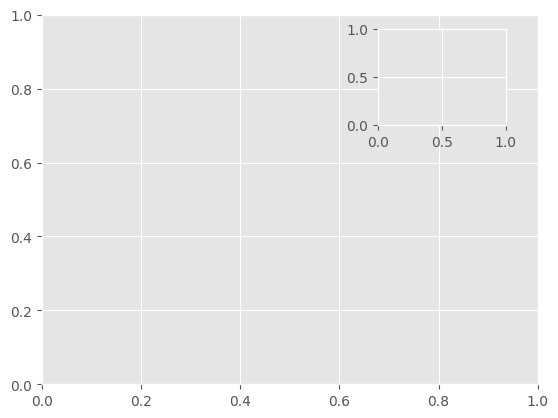

In [2]:
ax1 = plt.axes()  # ejes estándar
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

El equivalente de este comando dentro de la interfaz orientada a objetos es ``fig.add_axes()``. Usemos esto para crear dos ejes apilados verticalmente:

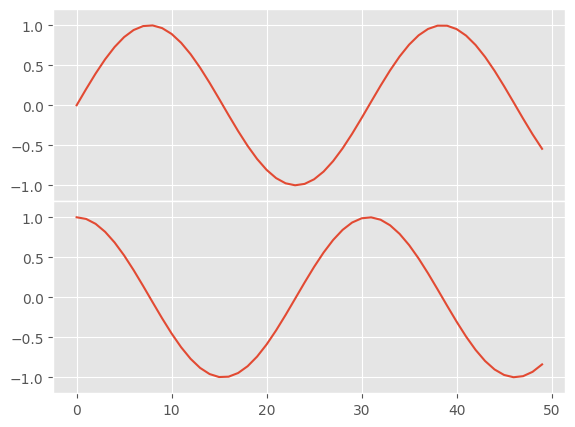

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

Ahora tenemos dos ejes (el superior sin etiquetas) que se están tocando: la parte inferior del panel superior (en la posición 0,5) coincide con la parte superior del panel inferior (en la posición 0,1 + 0,4).

## ``plt.subplot``: Cuadrículas simples de subplots

Las columnas o filas alineadas de subplots son una necesidad tan común que Matplotlib tiene varias rutinas que facilitan su creación.
El nivel más bajo es ``plt.subplot()``, que crea un único subgrupo dentro de una rejilla.
Como puede ver, este comando toma tres argumentos enteros: el número de filas, el número de columnas y el índice del gráfico a crear en este esquema, que va desde la parte superior izquierda a la inferior derecha:

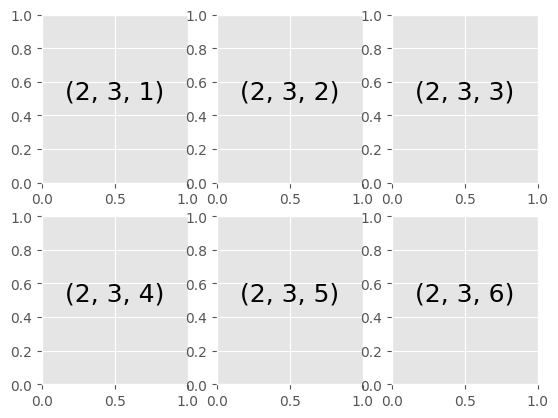

In [4]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

El comando ``plt.subplots_adjust`` puede utilizarse para ajustar el espaciado entre estos gráficos.
El siguiente código utiliza el comando orientado a objetos equivalente, ``fig.add_subplot()``:

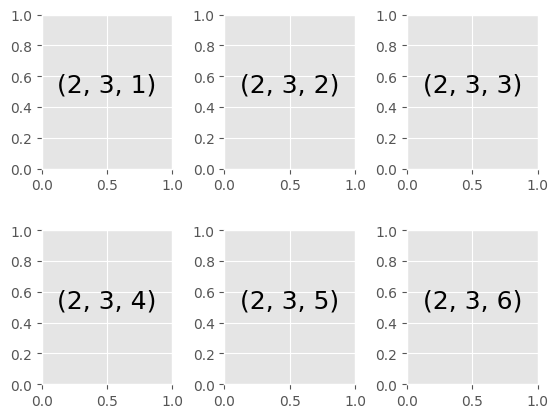

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)         #aquí están espaciados para que se vean mejor
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

Hemos utilizado los argumentos ``hspace`` y ``wspace`` de ``plt.subplots_adjust``, que especifican el espaciado a lo largo de la altura y la anchura de la figura, en unidades del tamaño de la subplot (en este caso, el espacio es el 40% de la anchura y la altura de la subplot).

## ``plt.subplots``: Toda la cuadrícula de una vez

El método descrito puede llegar a ser bastante tedioso cuando se crea una rejilla grande de subplots, especialmente si desea ocultar las etiquetas de los ejes X e Y en las parcelas interiores.
Para este propósito, ``plt.subplots()`` es la herramienta más fácil de usar. En lugar de crear un único subplot, esta función crea una rejilla completa de subplots en una sola línea, devolviéndolos en un array NumPy.
Los argumentos son el número de filas y el número de columnas, junto con las palabras clave opcionales ``sharex`` y ``sharey``, que permiten especificar las relaciones entre los distintos ejes.

Aquí crearemos una rejilla de subplots de $2 \times 3$, donde todos los ejes de la misma fila comparten la escala del eje y, y todos los ejes de la misma columna comparten la escala del eje x:

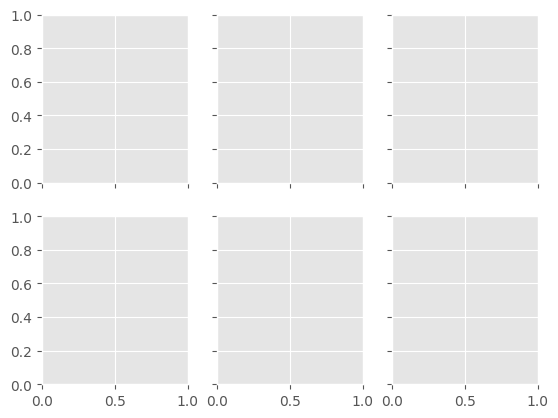

In [6]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Tenga en cuenta que al especificar ``sharex`` y ``sharey``, hemos eliminado automáticamente las etiquetas interiores de la rejilla para hacer el gráfico más limpio.
La rejilla resultante de instancias de ejes se devuelve dentro de una matriz NumPy, lo que permite la especificación conveniente de los ejes deseados utilizando la notación estándar de indexación de matrices:

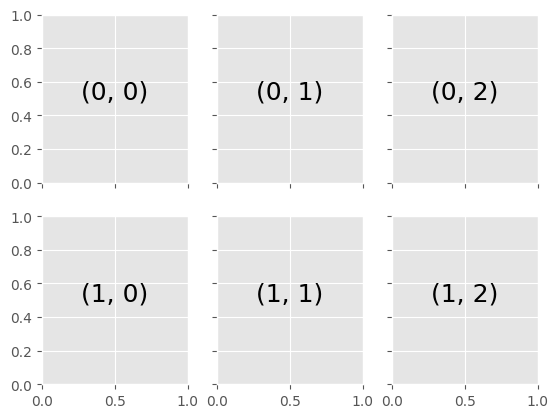

In [7]:
# los ejes están en una matriz bidimensional, indexada por [row, col].
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

En comparación con ``plt.subplot()``, ``plt.subplots()`` es más consistente con la indexación convencional basada en 0 de Python.

## ``plt.GridSpec``: Arreglos más complicados

Para ir más allá de una rejilla normal y crear subplots que abarquen varias filas y columnas, ``plt.GridSpec()`` es la mejor herramienta.
El objeto ``plt.GridSpec()`` no crea un gráfico por sí mismo; es simplemente una interfaz práctica que es reconocida por el comando ``plt.subplot()``.
Por ejemplo, una gridspec para una rejilla de dos filas y tres columnas con algún espacio especificado de anchura y altura se parece a esto:

In [12]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

A partir de aquí podemos especificar las ubicaciones y extensiones de las subparcelas utilizando la conocida sintaxis de corte de Python:

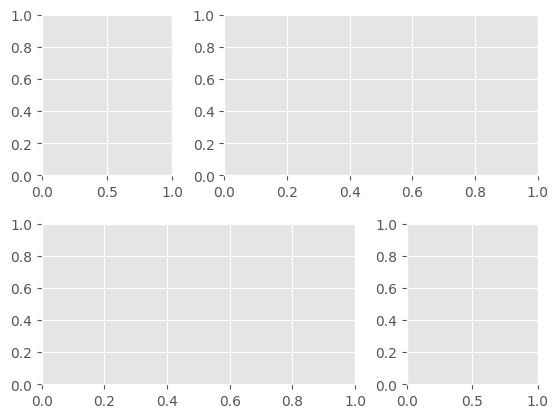

In [13]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

Este tipo de alineación flexible de la rejilla tiene una amplia gama de usos.
Se utiliza con más frecuencia para crear histogramas de varios ejes como los que se muestran aquí:

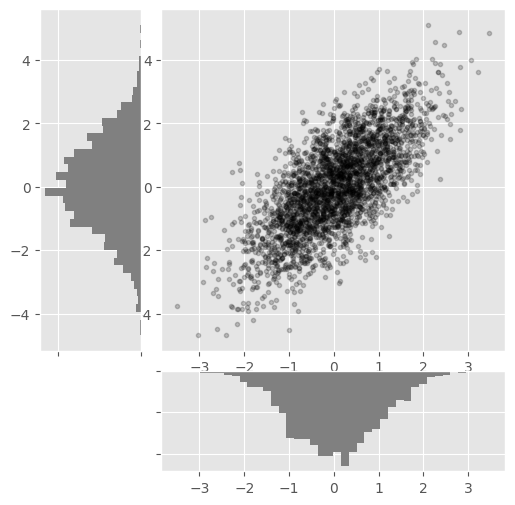

In [14]:
# Crear unos datos con distribución normal
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Configurar los ejes con gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# puntos de dispersión en los ejes principales
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histograma en los ejes adjuntos
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

<!--NAVIGATION-->
< [Customizando Legendas](7-Customizing_Legends.ipynb) | [Texto y anotación](8-Text_y_Annotation.ipynb) >
